In [14]:
# Imports
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})

df = pd.read_csv(r"C:\Users\m.al-zadid\OneDrive - Washington State University (email.wsu.edu)\WSU Pullman\Coursework\7th Semester\CPT_S 575\Project\Main Dataset.csv")

df["lag1"]  = df["caputil"].shift(1)
df["lag2"]  = df["caputil"].shift(2)
df["lag3"]  = df["caputil"].shift(3)
df["lag4"]  = df["caputil"].shift(4)
df["lag5"]  = df["caputil"].shift(5)
df["lag6"]  = df["caputil"].shift(6)
df["lag9"]  = df["caputil"].shift(9)
df["lag12"] = df["caputil"].shift(12)
df["lag18"] = df["caputil"].shift(18)
df["lag24"] = df["caputil"].shift(24)

df = df.dropna()

## Incorporating intervention dummy

df["observation_date"] = pd.to_datetime(df["observation_date"])
df = df.sort_values("observation_date")
df = df.set_index("observation_date")

df["intervention_dummy"] = (df.index >= "2020-04-01").astype(int)

In [ ]:
### GRADIENT BOOSTING WITH INTERNAL VARIABLES

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

df["laborp"] = df["laborp"].ffill()

features = ["pmi", "inv", "prodhr", "emp", "laborp",
            "lag1", "lag2", "lag3", "lag4","lag5",
            "lag6","lag9","lag12","lag18","lag24",
            "intervention_dummy"
           ]
target = "caputil"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False
)

#Grid searching
learning_rates = [0.01, 0.005, 0.001]
n_estimators_list = [500, 1500, 3000, 5000]

results = []

for lr in learning_rates:
    for n_est in n_estimators_list:

        gbr = GradientBoostingRegressor(
            n_estimators=n_est,
            learning_rate=lr,
            max_depth=1,
            random_state=42
        )

        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)

        mape = np.mean(np.abs((y_test - y_pred) / y_test))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({
            "learning_rate": lr,
            "n_estimators": n_est,
            "MAPE": mape,
            "RMSE": rmse
        })

results_df = pd.DataFrame(results)
print(results_df)

##MAPE and RMSE
best_mape = results_df.loc[results_df["MAPE"].idxmin()]
best_rmse = results_df.loc[results_df["RMSE"].idxmin()]

print("\nBest by MAPE:")
print(best_mape)

print("\nBest by RMSE:")
print(best_rmse)


    learning_rate  n_estimators      MAPE      RMSE
0           0.010           500  0.007303  0.623908
1           0.010          1500  0.004304  0.454004
2           0.010          3000  0.004697  0.460706
3           0.010          5000  0.004934  0.472770
4           0.005           500  0.013444  1.078282
5           0.005          1500  0.003820  0.425453
6           0.005          3000  0.003648  0.416472
7           0.005          5000  0.003893  0.416309
8           0.001           500  0.027048  2.395521
9           0.001          1500  0.017636  1.540834
10          0.001          3000  0.011544  0.931775
11          0.001          5000  0.006359  0.546123

Best by MAPE:
learning_rate       0.005000
n_estimators     3000.000000
MAPE                0.003648
RMSE                0.416472
Name: 6, dtype: float64

Best by RMSE:
learning_rate       0.005000
n_estimators     5000.000000
MAPE                0.003893
RMSE                0.416309
Name: 7, dtype: float64


In [ ]:
### GBM WITH EXT RISK INDICATORS

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Forward fill quarterly variables
df["laborp"] = df["laborp"].ffill()
df["stopg"]  = df["stopg"].ffill()

features = ["pmi", "inv", "prodhr", "emp", "laborp",
            "epui", "gscpi", "stopg", "ngpi", "iepi",
            "lag1", "lag2", "lag3", "lag4","lag5",
            "lag6","lag9","lag12","lag18","lag24",
            "intervention_dummy"
           ]

target = "caputil"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False
)

##Grid search

learning_rates = [0.01, 0.005, 0.001]
n_estimators_list = [500, 1500, 3000, 5000]

results = []

for lr in learning_rates:
    for n_est in n_estimators_list:

        gbr = GradientBoostingRegressor(
            n_estimators=n_est,
            learning_rate=lr,
            max_depth=2, 
            random_state=42
        )

        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)

        mape = np.mean(np.abs((y_test - y_pred) / y_test))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({
            "learning_rate": lr,
            "n_estimators": n_est,
            "MAPE": mape,
            "RMSE": rmse
        })

results_df = pd.DataFrame(results)
print(results_df)

## MAPE and RMSE
best_mape = results_df.loc[results_df["MAPE"].idxmin()]
best_rmse = results_df.loc[results_df["RMSE"].idxmin()]

print("\nBest by MAPE:")
print(best_mape)

print("\nBest by RMSE:")
print(best_rmse)


    learning_rate  n_estimators      MAPE      RMSE
0           0.010           500  0.008737  0.829677
1           0.010          1500  0.008522  0.819507
2           0.010          3000  0.008526  0.819310
3           0.010          5000  0.008526  0.819307
4           0.005           500  0.010522  0.845771
5           0.005          1500  0.008399  0.775248
6           0.005          3000  0.008315  0.771386
7           0.005          5000  0.008317  0.771265
8           0.001           500  0.020093  1.910742
9           0.001          1500  0.013650  1.093424
10          0.001          3000  0.010161  0.856114
11          0.001          5000  0.008888  0.837511

Best by MAPE:
learning_rate       0.005000
n_estimators     3000.000000
MAPE                0.008315
RMSE                0.771386
Name: 6, dtype: float64

Best by RMSE:
learning_rate       0.005000
n_estimators     5000.000000
MAPE                0.008317
RMSE                0.771265
Name: 7, dtype: float64


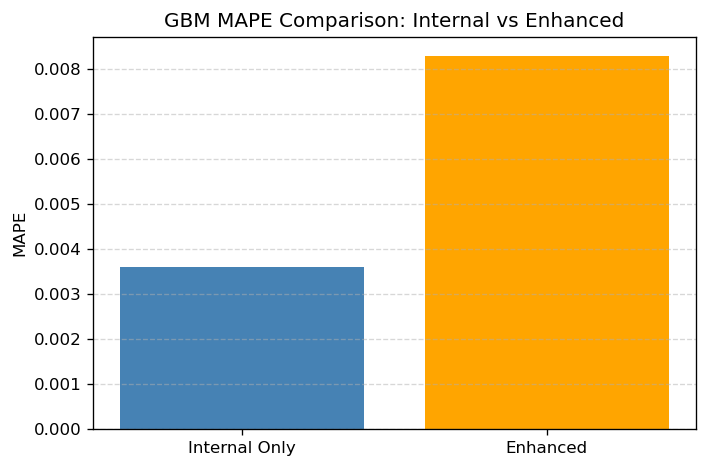

In [21]:
import matplotlib.pyplot as plt

mape_internal = 0.0036
mape_external = 0.0083

plt.figure(figsize=(6,4))
plt.bar(["Internal Only", "Enhanced"], 
        [mape_internal, mape_external], 
        color=["steelblue", "orange"])

plt.ylabel("MAPE")
plt.title("GBM MAPE Comparison: Internal vs Enhanced")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


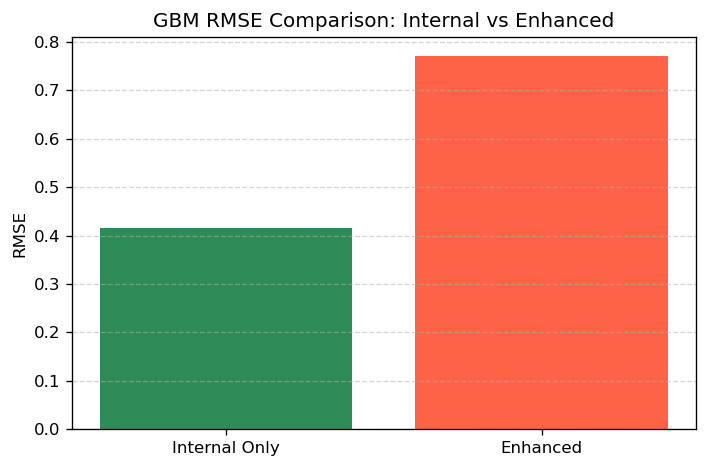

In [22]:
import matplotlib.pyplot as plt

rmse_internal = 0.4165
rmse_external = 0.7714

plt.figure(figsize=(6,4))
plt.bar(["Internal Only", "Enhanced"], 
        [rmse_internal, rmse_external], 
        color=["seagreen", "tomato"])

plt.ylabel("RMSE")
plt.title("GBM RMSE Comparison: Internal vs Enhanced")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [13]:
importances = gbr.feature_importances_
feature_names = X_train.columns

gb_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(gb_importance_df)


               feature  importance
10                lag1    0.364783
11                lag2    0.314776
13                lag4    0.128128
12                lag3    0.112991
18               lag18    0.013200
8                 ngpi    0.011931
19               lag24    0.011843
0                  pmi    0.005972
2               prodhr    0.005826
5                 epui    0.005429
4               laborp    0.004745
9                 iepi    0.003635
6                gscpi    0.003624
17               lag12    0.003454
1                  inv    0.003001
16                lag9    0.002905
15                lag6    0.001689
14                lag5    0.001172
3                  emp    0.000894
7                stopg    0.000000
20  intervention_dummy    0.000000
